In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tqdm import trange
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
sides = np.random.random((10000,1))*100
areas = sides**2

split_index = int(0.8 * len(sides))

sides_train, areas_train = sides[:split_index], areas[:split_index]
sides_test, areas_test = sides[split_index:], areas[split_index:]

In [4]:
model = keras.Sequential([
    Dense(units=32, activation='relu', input_shape=(1,)),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [5]:
history = model.fit(sides_train, areas_train, validation_split=0.2, epochs=5000, batch_size=256)

Epoch 1/5000

25/25 [==============================] - 1s 8ms/step - loss: 19884532.0000 - val_loss: 19199692.0000
Epoch 2/5000
25/25 [==============================] - 0s 2ms/step - loss: 19776018.0000 - val_loss: 19094946.0000
Epoch 3/5000
25/25 [==============================] - 0s 2ms/step - loss: 19647376.0000 - val_loss: 18943160.0000
Epoch 4/5000
25/25 [==============================] - 0s 2ms/step - loss: 19459412.0000 - val_loss: 18719974.0000
Epoch 5/5000
25/25 [==============================] - 0s 2ms/step - loss: 19185608.0000 - val_loss: 18400614.0000
Epoch 6/5000
25/25 [==============================] - 0s 2ms/step - loss: 18797992.0000 - val_loss: 17950018.0000
Epoch 7/5000
25/25 [==============================] - 0s 2ms/step - loss: 18254886.0000 - val_loss: 17336080.0000
Epoch 8/5000
25/25 [==============================] - 0s 2ms/step - loss: 17529162.0000 - val_loss: 16518655.0000
Epoch 9/5000
25/25 [==============================] - 0s 2ms/step - loss: 16584485.0000

In [6]:
model.evaluate(sides_test, areas_test, verbose=2)

63/63 - 0s - loss: 32.7847 - 60ms/epoch - 955us/step


32.7846794128418

In [11]:
model.save(f"./models/Squares_Model_32x32")

INFO:tensorflow:Assets written to: ./models/Squares_Model_32x32\assets


INFO:tensorflow:Assets written to: ./models/Squares_Model_32x32\assets


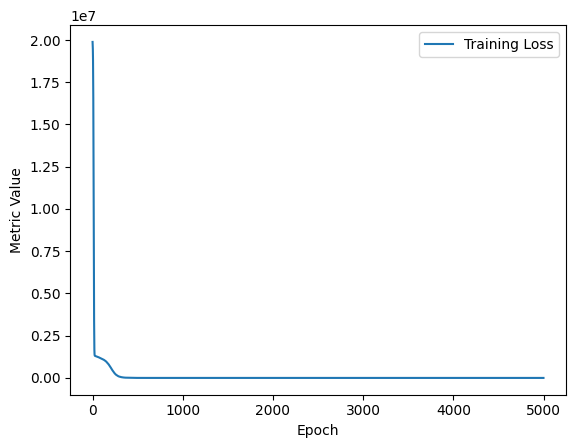

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

32/32 [==============================] - 0s 743us/step


Text(0.5, 1.0, 'Original data')

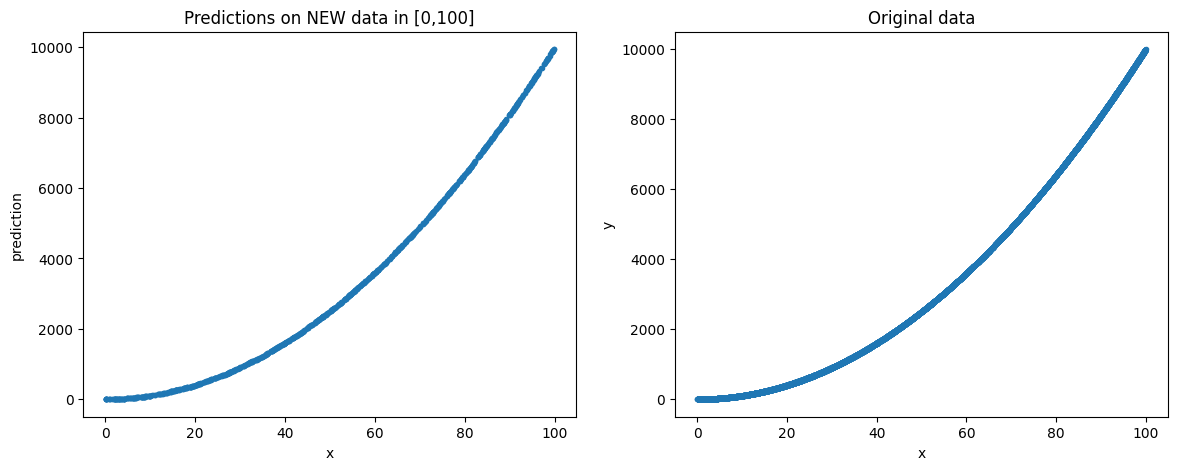

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
p = np.random.random((1000,1))*100
plt.plot(p,model.predict(p), '.')
plt.xlabel('x')
plt.ylabel('prediction')
plt.title('Predictions on NEW data in [0,100]')

plt.subplot(1,2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(sides,areas,'.')
plt.title('Original data')

In [10]:
test = [1,5,10,20,50,100]
predicted_area = model.predict(test)
np.set_printoptions(suppress=True)
output_line = ', '.join(map(str, [elem[0] for elem in predicted_area]))
print(output_line)

1/1 [==============================] - 0s 62ms/step
1.0818157, 25.4653, 101.26053, 394.25082, 2501.3447, 9982.354
